In [167]:
import numpy as np
from matplotlib import pyplot as plt

In [168]:
def build_data():
    x = np.array(range(256))
    ns = np.random.normal(size=(256,))
    y = x * 3 + 10 + ns
    return x, y

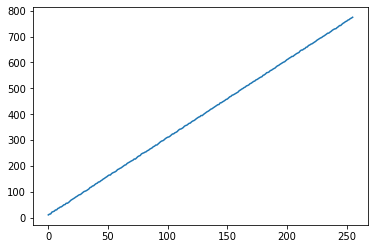

In [169]:
(data_x, data_y) = build_data()
plt.plot(data_x, data_y)
plt.show()

In [174]:
class LrModel():
    def __init__(self):
        self.a = 0
        self.b = 0
        self.alpha = 0.0000003
        
    def fit(self, data_x, data_y):
        for loop in range(1024):
            data_len = len(data_x)
            grad_a = 0
            grad_b = 0
            for i in range(data_len):
                comm = (self.a * data_x[i] + self.b - data_y[i]) / data_len * self.alpha
                grad_a += comm * data_x[i]
                grad_b += comm
            self.a -= grad_a
            self.b -= grad_b
            if loop % 100 == 0:
                info = "a = {}, b = {}, mse = {}".format(self.a, self.b, self._mse(data_x, data_y))
                print(info)
            
    def predict(self, x):
        return self.a * x + self.b
    
    def _mse(self, data_x, data_y):
        mse = 0
        data_len = len(data_x)
        for i in range(data_len):
            mse += (self.a * data_x[i] + self.b - data_y[i]) ** 2 / data_len
        return mse
        
    def get_params(self):
        return (self.a, self.b)
    
    

In [175]:
model = LrModel()
model.fit(data_x, data_y)

a = 0.019929535583306405, b = 0.00011775520459889268, mse = 200595.1252173806
a = 1.478196748474592, b = 0.008754180252570219, mse = 54286.59273921141
a = 2.236682943971093, b = 0.013282253736194755, mse = 14705.202999712084
a = 2.6311930554809804, b = 0.01567345601721766, mse = 3997.102683063675
a = 2.8363888151856442, b = 0.016953210312176777, mse = 1100.200349456331
a = 2.9431167761091346, b = 0.017654868509034093, mse = 316.4903520870549
a = 2.9986288239007957, b = 0.01805584215046374, mse = 104.4701082810797
a = 3.027502013199427, b = 0.018300420899156202, mse = 47.11121201598659
a = 3.042519571730609, b = 0.018463653927755543, mse = 31.59342323233988
a = 3.0503304211607336, b = 0.018584576453405333, mse = 27.39506430997546
a = 3.0543928554570874, b = 0.01868349180689313, mse = 26.258992698421107


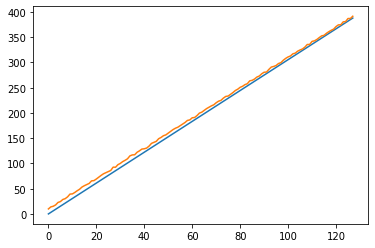

In [176]:
a, b = model.get_params()
tx = np.array(range(128))
ty = a * tx + b
plt.plot(tx, ty)
plt.plot(x_data, y_data)
plt.show()